# **Before Attempting to run...**

# Make sure the relative filepath of the experimental data folder is correct.

The notebook and the experimental data folder should be degenerate, and your IDE should be open to the folder containing both the notebook and the experimental data folder. Don't put the notebook *inside* the experimental data folder.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as st
from scipy import constants
from scipy.stats import t
import scipy.signal as sig
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from time import sleep,time
from threading import Thread
#from ipycanvas import MultiCanvas, hold_canvas,Canvas

**STOP STOP STOP**

Enable of Disable the following (True or Fasle) as required.

When set to true it will use $\LaTeX$ for typesetting exported graphs at the cost of several orders of magnitude longer running time.

Obviously you need a $\LaTeX$ distribution to get the really nice graphs. Dont ever run one of the loops that produced like 6 graphs with this enabled. If you run the complicated curve fitting cell with this on it will take minutes or crash.

In [9]:
plt.rcParams.update({'font.family':'Computer Modern Roman'})
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.family':'Computer Modern Roman'})

**Linear Regression & Determination of k**

We can rearrange the spring equation to give us a linear expression in terms of the added mass

$$
F = \Delta x k,
\newline
m = \frac{k}{g} \Delta x
$$

k is  3.1121865367951966  +/-  0.2190016873510608


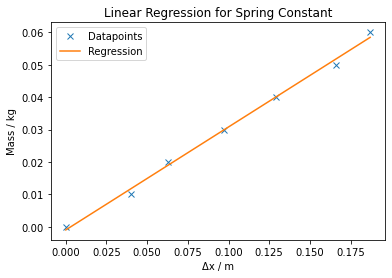

In [6]:
# This is for the Spring Constant used in the in and out of phase trials

# Data entered directly into python from the digital Lab Notebook
m = [0, 0.010, 0.020, 0.030, 0.040, 0.050, 0.060]
dx = [0, 0.040, 0.063, 0.097, 0.129, 0.166, 0.187]

# And now for the linear Regression
res = st.linregress(dx, m)

# A value for k using our equation
k = res.slope*constants.g

# Uncertaintie on k

df = len(m) - 2
alpha = 0.95

U = res.stderr*(st.t.interval(alpha, df)[1])*constants.g

# Print Out

print('k is ',k,' +/- ',U)

# Plotting for clarity

y_res = np.add(np.multiply(float(res.slope), dx), res.intercept)

plt.plot(dx,m, 'x', label='Datapoints')
plt.plot(dx,y_res, label='Regression')

plt.xlabel('Δx / m')
plt.ylabel('Mass / kg')
plt.legend()
plt.title('Linear Regression for Spring Constant')
plt.show()

k is  2.9865953219411776  +/-  0.28735666386803793


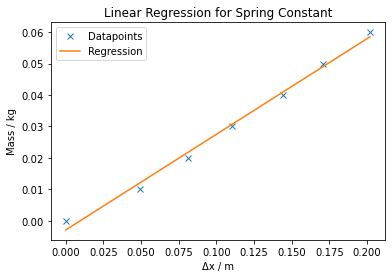

In [7]:
# This is the Spring Constant used in the Beat experiment

# Data entered directly into python from the digital Lab Notebook
m = [0, 0.010, 0.020, 0.030, 0.040, 0.050, 0.060]
dx = [0, 0.049, 0.081, 0.11, 0.144, 0.171, 0.202]

# And now for the linear Regression
res = st.linregress(dx, m)

# A value for k using our equation
k = res.slope*constants.g

# Uncertaintie on k

df = len(m) - 2
alpha = 0.95

U = res.stderr*(st.t.interval(alpha, df)[1])*constants.g

# Print Out

print('k is ',k,' +/- ',U)

# Plotting for clarity

y_res = np.add(np.multiply(float(res.slope), dx), res.intercept)

plt.plot(dx,m, 'x', label='Datapoints')
plt.plot(dx,y_res, label='Regression')

plt.xlabel('Δx / m')
plt.ylabel('Mass / kg')
plt.legend()
plt.title('Linear Regression for Spring Constant')
plt.show()

# **Experiment 1, Uncoupled Pendula**

Self explanatory, 3 trials per pendula.

In [8]:
# Importing Data for Experiment 1

# FT Data
f11left = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/fourier first trial left pendulum independance 2022-06-10 08_35_37.csv')
f12left = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/fourier second trial left pendulum independance 2022-06-10 08_35_37.csv')
f13left = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/fourier third trial left pendulum independance 2022-06-10 08_35_38.csv')
f11right = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/fourier first trial right pendulum independance 2022-06-10 08_35_37.csv')
f12right = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/fourier second trial right pendulum independance 2022-06-10 08_35_38.csv')
f13right = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/fourier third trial right pendulum independance 2022-06-10 08_35_38.csv')

ft1 = [f11left, f12left, f13left, f11right, f12right, f13right]
ft1_title = ['Experiment 1, Left Pendulum, Trial 1, FT','Experiment 1, Left Pendulum, Trial 2, FT','Experiment 1, Left Pendulum, Trial 3, FT',\
    'Experiment 1, Right Pendulum, Trial 1, FT','Experiment 1, Right Pendulum, Trial 2, FT','Experiment 1, Right Pendulum, Trial 3, FT']

# Non FT Data
cp11left = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/cp first trial left pendulum independance 2022-06-10 07_17_42.csv')
cp12left = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/cp second trial left pendulum independance 2022-06-10 07_17_43.csv')
cp13left = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/cp third trial left pendulum independance 2022-06-10 07_17_47.csv')
cp11right = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/cp first trial right pendulum independance 2022-06-10 07_17_42.csv')
cp12right = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/cp second trial right pendulum independance 2022-06-10 07_17_45.csv')
cp13right = pd.read_csv('Experimental Data/Week 1, Verify Pendula Independance/cp third trial right pendulum independance 2022-06-10 08_35_36.csv')

cp1 = [cp11left, cp12left, cp13left, cp11right, cp12right, cp13right]
cp1_title = ['Experiment 1, Left Pendulum, Trial 1','Experiment 1, Left Pendulum, Trial 2','Experiment 1, Left Pendulum, Trial 3',\
    'Experiment 1, Right Pendulum, Trial 1','Experiment 1, Right Pendulum, Trial 2','Experiment 1, Right Pendulum, Trial 3']

<ipython-input-38-9faad5b7e808>:16: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000025043E66640> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['Left Pendulum','_nolegend_','_nolegend_','Right Pendulum','_nolegend_','_nolegend_'])
<ipython-input-38-9faad5b7e808>:16: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000025043E66E20> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['Left Pendulum','_nolegend_','_nolegend_','Right Pendulum','_nolegend_','_nolegend_'])
<ipython-input-38-9faad5b7e808>:16: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000025043E66160> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['Left Pendulum','_nolegend_','_nolegend_','Right Pendulum','_nolegend_','_nolegend_'])
<ipython-input-38-9faad5b7e808>:16: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000025043E660A0> 

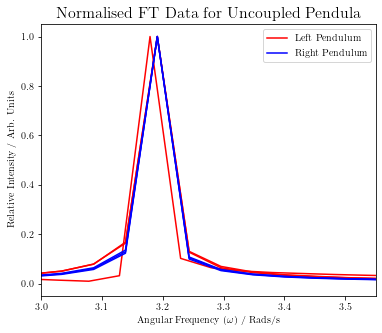

In [38]:
# Comparative FT Graph - Good Plot for Export

# You want the fancy export cell on to make this look good

plt.figure(figsize=[6,5])

for trial in ft1[0:3]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), (trial['Amplitude']/max(trial['Amplitude'])), color='r')

for trial in ft1[3:6]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), (trial['Amplitude']/max(trial['Amplitude'])), color='b')

plt.xlim(3,3.55)
plt.xlabel('Angular Frequency ($\omega$) / Rads/s')
plt.ylabel('Relative Intensity / Arb. Units')
plt.legend(['Left Pendulum','_nolegend_','_nolegend_','Right Pendulum','_nolegend_','_nolegend_'])
plt.title('Normalised FT Data for Uncoupled Pendula', fontsize=16)

#plt.savefig('Diagrams\Normalised In-Phase FT Frequency Comparrison.eps', transparent=True)
plt.savefig( 'Diagrams\\Normalised Independant FT.pdf', transparent=True)

[3.18437501 0.02102171 0.08566776] [[ 1.68877323e-05 -6.14082937e-06  1.79271691e-05]
 [-6.14082937e-06  4.17920939e-06 -7.41204465e-06]
 [ 1.79271691e-05 -7.41204465e-06  2.78550976e-05]]
[3.18953059 0.02680916 0.08215731] [[ 6.09732734e-06  5.63276916e-07 -1.09077146e-06]
 [ 5.63276916e-07  1.71677213e-06 -9.58086755e-07]
 [-1.09077146e-06 -9.58086755e-07  9.86579444e-06]]
[3.18952496 0.0266357  0.08272744] [[ 5.92684827e-06  5.55934099e-07 -1.09044331e-06]
 [ 5.55934099e-07  1.64491558e-06 -9.06890532e-07]
 [-1.09044331e-06 -9.06890532e-07  9.50427618e-06]]
[ 3.18997446 -0.02495001  0.07199929] [[ 4.60564793e-06 -3.56917117e-07 -6.41974628e-07]
 [-3.56917117e-07  1.09221957e-06  3.86222585e-07]
 [-6.41974628e-07  3.86222585e-07  4.23087990e-06]]
[ 3.18993958 -0.0252178   0.07670707] [[ 4.85529513e-06 -3.79835212e-07 -7.21729035e-07]
 [-3.79835212e-07  1.17955767e-06  4.66562213e-07]
 [-7.21729035e-07  4.66562213e-07  5.31923700e-06]]
[ 3.18980322 -0.02547541  0.08378689] [[ 5.063373

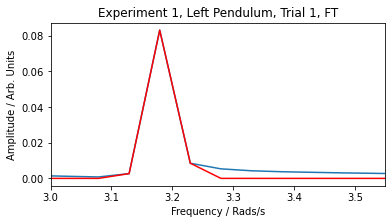

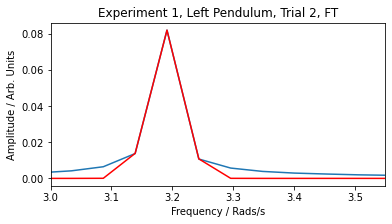

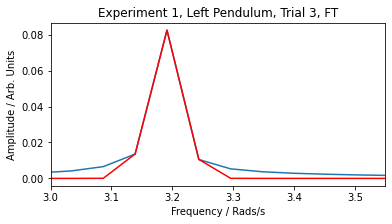

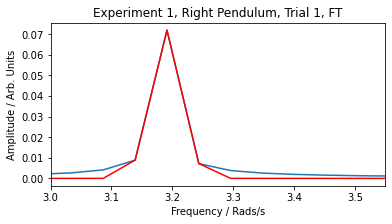

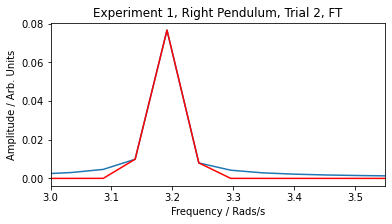

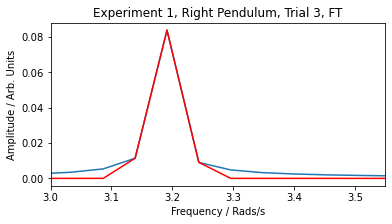

In [12]:
# Fitting Guassians and extracting values from FT Data

def gauss(x, mu, sigma, A):
    return A*np.exp( (-1/2)*((x-mu)/sigma)**2 )

exp1_mean_peaks = []
exp1_peaks_U = []

for count, trial in enumerate(ft1):
    
    x_data = trial['Frequency (Hz)']*2*constants.pi
    x_data = x_data[55:74]

    y_data = trial['Amplitude']
    y_data = y_data[55:74]

    plt.figure(figsize=[6,3])
    plt.plot(x_data, y_data)
    plt.xlim(3.0,3.55)
    plt.xlabel('Frequency / Rads/s')
    plt.ylabel('Amplitude / Arb. Units')
    plt.title(ft1_title[count])

    # Fit a gaussian to the data
    popt, pcov = curve_fit(gauss, x_data, y_data, p0=[3.2, 1, 2]) 
    print(popt,pcov)
    plt.plot(x_data, gauss(x_data, *popt), 'r-')

    exp1_mean_peaks.append(popt[0])
    exp1_peaks_U.append(abs(popt[1]))

print(exp1_mean_peaks, exp1_peaks_U)

In [13]:
# Simple Data Analysis for EXP1

mu_1 = np.mean(exp1_mean_peaks[0:3])
mu_2 = np.mean(exp1_mean_peaks[3:6])
mu_p = np.mean(exp1_mean_peaks)

sigma_1 =  np.mean(exp1_peaks_U[0:3])
sigma_2 = np.mean(exp1_peaks_U[3:6])
sigma_p = ( ( 2*sigma_1**2 + 2*sigma_2**2 )/( 4 ) )**0.5

print('Left pendulum averaga = ',mu_1,'  Right pendulum average = ',mu_2,' Pooled average = ',mu_p)

print('Left pendulum U = ',sigma_1,'  Right pendulum U = ',sigma_2,' Pooled U = ',sigma_p)

print('Left pendulum CI = ',2*sigma_1,'  Right pendulum CI = ', 2*sigma_2,' Pooled CI = ',2*sigma_p)

# 95% confidence interval / 2 sigma for all

Left pendulum averaga =  3.187810186897408   Right pendulum average =  3.189905752199909  Pooled average =  3.1888579695486583
Left pendulum U =  0.02482218973236676   Right pendulum U =  0.025214407467853542  Pooled U =  0.0250190671994837
Left pendulum CI =  0.04964437946473352   Right pendulum CI =  0.050428814935707084  Pooled CI =  0.0500381343989674


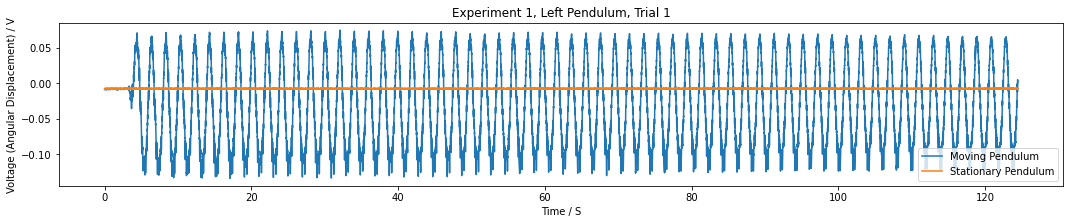

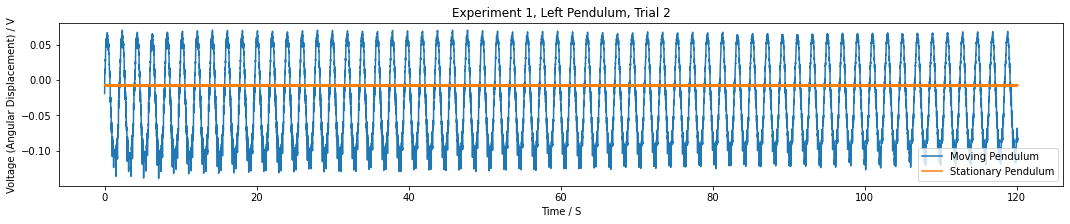

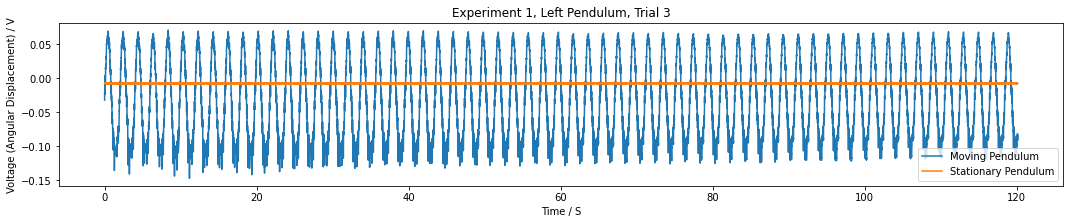

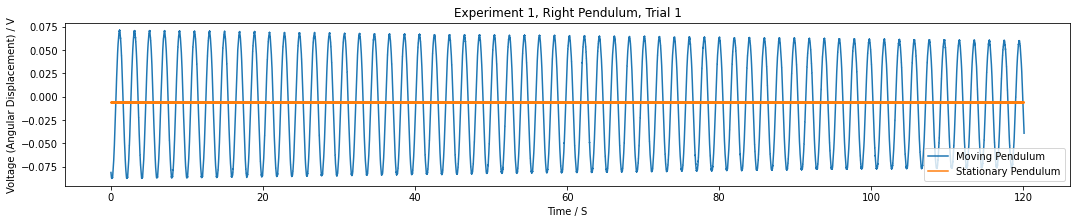

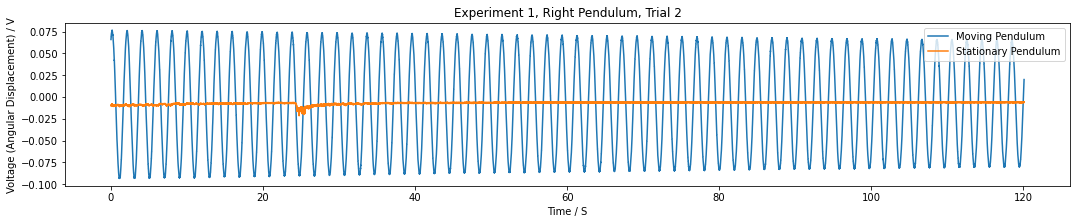

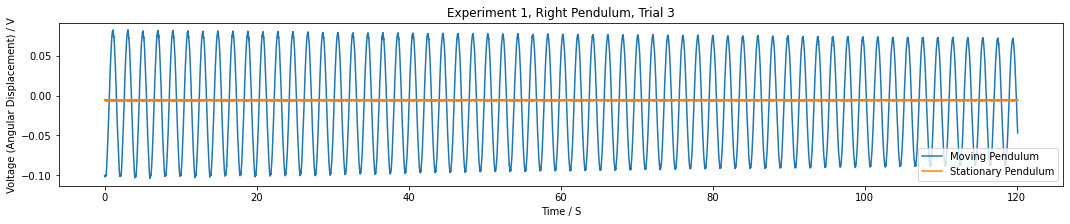

In [14]:
# This loop plots the raw pendula angle displacement, if you wanted to look at that run/expand this

# Resolution is complete crap, add a plt.savefig('title.svg') to the end of the loop to save the figure nicely

for count, trial, in enumerate(cp1):
    plt.figure(figsize=[18,3])
    plt.plot(trial['Time (s)'], trial[' Voltage 0 (V)'], label='Moving Pendulum')
    plt.plot(trial['Time (s)'], trial['Voltage 1 (V)'], label='Stationary Pendulum')
    plt.xlabel('Time / S')
    plt.ylabel('Voltage (Angular Displacement) / V')
    plt.legend()
    plt.title(cp1_title[count])

# **Experiment 2, In-Phase Mode**

Three trials total with differing values of $\ell$ in order to show their independance.

In [15]:
# Importing Data

ft2200 = pd.read_csv('Experimental Data/Week 1, In phase vibrational mode/ft 200 1 2022-06-10 07_17_23.csv')
ft2400 = pd.read_csv('Experimental Data/Week 1, In phase vibrational mode/ft 400 1 2022-06-10 07_17_23.csv')
ft2600 = pd.read_csv('Experimental Data/Week 1, In phase vibrational mode/ft 600 1 2022-06-10 07_17_24.csv')

ft2 = [ft2200, ft2400, ft2600]
ft2_title = ['Experiment 2: l = 200 mm, F.T.','Experiment 2: l = 400 mm, F.T.','Experiment 2: l = 600 mm, F.T.']

cp2200 = pd.read_csv('Experimental Data/Week 1, In phase vibrational mode/cp l 200 trail 1 2022-06-10 07_17_21.csv')
cp2400 = pd.read_csv('Experimental Data/Week 1, In phase vibrational mode/cp l 400 trial 1 2022-06-10 07_17_22.csv')
cp2600 = pd.read_csv('Experimental Data/Week 1, In phase vibrational mode/cp l 600 trial 1 2022-06-10 07_17_23.csv')

cp2 = [cp2200, cp2400, cp2600]
cp2_title = ['Experiment 2: l = 200 mm','Experiment 2: l = 400 mm','Experiment 2: l = 600 mm']

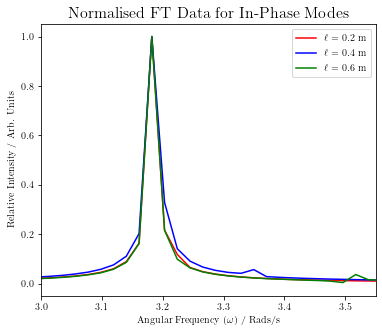

In [39]:
# Comparative FT Graph - Good Plot for Export

# Fancy export cell required to be enabled

plt.figure(figsize=[6,5])

for trial in ft2[0:1]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), (trial['Amplitude']/max(trial['Amplitude'])), color='r')

for trial in ft2[1:2]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), (trial['Amplitude']/max(trial['Amplitude'])), color='b')

for trial in ft2[2:3]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), (trial['Amplitude']/max(trial['Amplitude'])), color='g')

plt.xlim(3,3.55)
plt.xlabel('Angular Frequency ($\omega$) / Rads/s')
plt.ylabel('Relative Intensity / Arb. Units')
plt.legend(['$\ell =$ 0.2 m','$\ell =$ 0.4 m','$\ell =$ 0.6 m'])
plt.title('Normalised FT Data for In-Phase Modes', fontsize=16)

#plt.savefig('Diagrams/Normalised In-Phase FT Frequency Comparrison.eps', transparent=True)
plt.savefig('Diagrams/Normalised In-Phase FT Frequency Comparrison.pdf', transparent=True)

[3.18310543 0.01150754 0.10157941] [[ 7.68398895e-10 -8.04202253e-11  4.51540681e-10]
 [-8.04202253e-11  2.58314970e-10 -5.63906648e-10]
 [ 4.51540681e-10 -5.63906648e-10  1.47971302e-08]]
[3.18408562 0.01293709 0.09820974] [[ 1.20751338e-09 -1.99182527e-10  9.62118722e-10]
 [-1.99182527e-10  5.88545574e-10 -1.66989072e-09]
 [ 9.62118722e-10 -1.66989072e-09  2.82737367e-08]]
[3.18310784 0.01148458 0.12237626] [[ 1.15971623e-09 -1.22228094e-10  8.28485069e-10]
 [-1.22228094e-10  3.88129828e-10 -1.01671493e-09]
 [ 8.28485069e-10 -1.01671493e-09  3.22541616e-08]]
[3.1843750118595926, 3.1895305922743122, 3.189524956558319, 3.1899744559368037, 3.1899395761870846, 3.189803224475838] [0.021021711759432855, 0.026809159781352395, 0.02663569765631503, 0.02495000977086401, 0.025217804781848402, 0.025475407850848217]


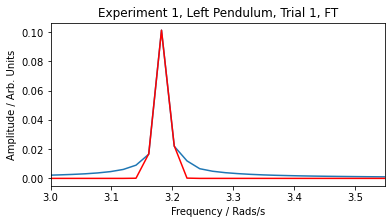

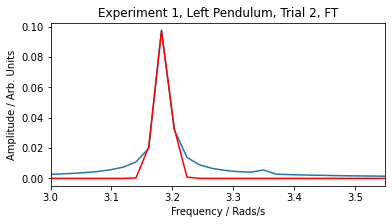

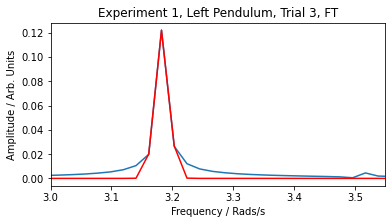

In [17]:
# Fitting Guassians and extracting values

def gauss(x, mu, sigma, A):
    return A*np.exp( (-1/2)*((x-mu)/sigma)**2 )

exp2_mean_peaks = []
exp2_peaks_U = []

for count, trial in enumerate(ft2):
    
    x_data = trial['Frequency (Hz)']*2*constants.pi
    #x_data = x_data[55:74]

    y_data = trial['Amplitude']
    #y_data = y_data[55:74]

    plt.figure(figsize=[6,3])
    plt.plot(x_data, y_data)
    plt.xlim(3.0,3.55)
    plt.xlabel('Frequency / Rads/s')
    plt.ylabel('Amplitude / Arb. Units')
    plt.title(ft1_title[count])

    # Fit a gaussian to the data
    popt, pcov = curve_fit(gauss, x_data, y_data, p0=[3.18, 0.12, 0.1]) 
    print(popt,pcov)
    plt.plot(x_data, gauss(x_data, *popt), 'r-')

    exp2_mean_peaks.append(popt[0])
    exp2_peaks_U.append(abs(popt[1]))

print(exp1_mean_peaks, exp1_peaks_U)

In [18]:
# Simple Data Analysis

mu_1 = exp2_mean_peaks[0]
mu_2 = exp2_mean_peaks[1]
mu_3 = exp2_mean_peaks[2]
mu_p = np.mean(exp2_mean_peaks)

sigma_1 = np.mean(abs(exp2_peaks_U[0]))
sigma_2 = np.mean(abs(exp2_peaks_U[1]))
sigma_3 = np.mean(abs(exp2_peaks_U[2]))
sigma_p = np.mean(np.abs(exp2_peaks_U))

print('l = 0.2 = ',mu_1,'  l = 0.4 = ',mu_2,' l = 0.6  = ',mu_3,' L pooled = ',mu_p)

print('l = 0.2 U = ',sigma_1,'  l = 0.4 U = ',sigma_2,' l = 0.6 U  = ',sigma_3,' L pooled U = ',sigma_p)

print('l = 0.2 CI = ',2*sigma_1,'  l = 0.4 CI = ',2*sigma_2,' l = 0.6 CI  = ',2*sigma_3,' L pooled CI = ',2*sigma_p)

l = 0.2 =  3.183105427891797   l = 0.4 =  3.184085615271773  l = 0.6  =  3.183107835705328  L pooled =  3.1834329596229662
l = 0.2 U =  0.011507542695950048   l = 0.4 U =  0.012937090195090309  l = 0.6 U  =  0.011484575123363422  L pooled U =  0.011976402671467927
l = 0.2 CI =  0.023015085391900097   l = 0.4 CI =  0.025874180390180617  l = 0.6 CI  =  0.022969150246726844  L pooled CI =  0.023952805342935854


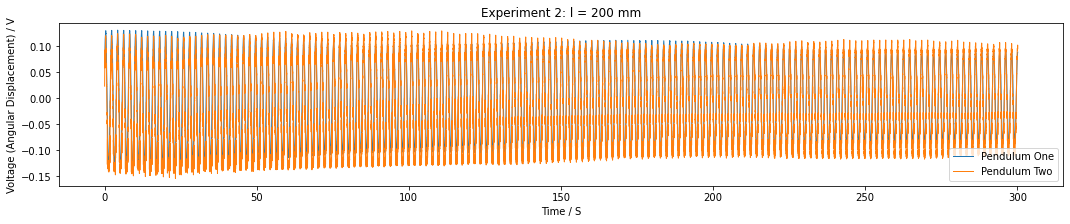

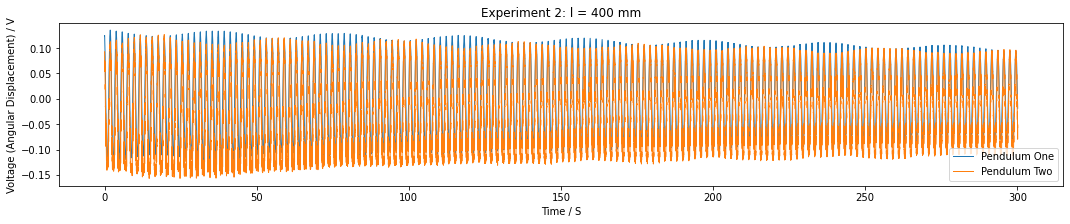

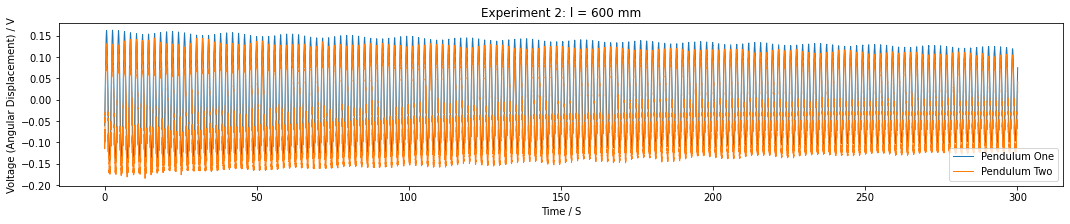

In [19]:
# Plot for raw pendulum data, remember save the figure as an svg if youwant any detail

for count, trial, in enumerate(cp2):
    plt.figure(figsize=[18,3])
    plt.plot(trial['Time (s)'], trial[' Voltage 0 (V)'], label='Pendulum One', linewidth=1)
    plt.plot(trial['Time (s)'], trial['Voltage 1 (V)'], label='Pendulum Two', linewidth=1)
    plt.xlabel('Time / S')
    plt.ylabel('Voltage (Angular Displacement) / V')
    plt.legend()
    plt.title(cp2_title[count])

# **Experiment 3, Out-of-Phase Mode**

3 Trails per $\ell$, 9 in total.

In [92]:
# Importing Data

cp32001 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/cp l = 200 trial 1 2022-06-10 07_17_25.csv')
cp32002 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/cp l = 200 trial 2 2022-06-10 07_17_25.csv')
cp32003 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/cp l = 200 trial 3 2022-06-10 07_17_27.csv')
cp34001 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/cp l=400 trial 1 2022-06-10 07_17_30.csv')
cp34002 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/cp l=400 trial 2 2022-06-10 07_17_30.csv')
cp34003 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/cp l = 400 trial 3 2022-06-10 07_17_27.csv')
cp36001 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/cp l = 600 trial 1 2022-06-10 07_17_29.csv')
cp36002 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/cp l =600 trial 2 2022-06-10 07_17_29.csv')
cp36003 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/cp l=600 trial 3 2022-06-10 07_17_31.csv')

cp3 = [cp32001, cp32002, cp32003, cp34001, cp34002, cp34003, cp36001, cp36002, cp36003]
cp3_title = ['Experiment 3: l = 200 mm, Trial 1','Experiment 3: l = 200 mm, Trial 2','Experiment 3: l = 200 mm, Trial 3',\
             'Experiment 3: l = 400 mm, Trial 1','Experiment 3: l = 400 mm, Trial 2','Experiment 3: l = 400 mm, Trial 3',\
             'Experiment 3: l = 600 mm, Trial 1','Experiment 3: l = 600 mm, Trial 2','Experiment 3: l = 600 mm, Trial 3']

ft32001 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/fourier l = 200 trial 1 2022-06-10 07_17_33.csv')
ft32002 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/fourier l = 200 trial 2 2022-06-10 07_17_33.csv')
ft32003 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/fourier l = 200 trial 3 2022-06-10 07_17_34.csv')
ft34001 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/fourier l=400 trial 1 2022-06-10 07_17_40.csv')
ft34002 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/Fourier l=400 trial 2 2022-06-10 07_17_24.csv')
ft34003 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/fourier l = 400 trial 3 2022-06-10 07_17_34.csv')
ft36001 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/fourier l = 600 trial 1 2022-06-10 07_17_35.csv')
ft36002 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/fourier l=600 trial 2 2022-06-10 07_17_41.csv')
ft36003 = pd.read_csv('Experimental Data/Week 1, Out of Phase Vibrational Mode/fourier l=600 trial 3 2022-06-10 07_17_41.csv')

ft3 = [ft32001, ft32002, ft32003, ft34001, ft34002, ft34003, ft36001, ft36002, ft36003]
ft3_title = ['Experiment 3: l = 200 mm, Trial 1 F.T.','Experiment 3: l = 200 mm, Trial 2 F.T.','Experiment 3: l = 200 mm, Trial 3 F.T.',\
             'Experiment 3: l = 400 mm, Trial 1 F.T.','Experiment 3: l = 400 mm, Trial 2 F.T.','Experiment 3: l = 400 mm, Trial 3 F.T.',\
             'Experiment 3: l = 600 mm, Trial 1 F.T.','Experiment 3: l = 600 mm, Trial 2 F.T.','Experiment 3: l = 600 mm, Trial 3mF.T.']

<ipython-input-40-6cc220fae684>:17: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000025044019610> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['$\ell =$ 0.2 m','_nolegend_','_nolegend_','$\ell =$ 0.4 m','_nolegend_','_nolegend_','$\ell =$ 0.6 m','_nolegend_','_nolegend_'])
<ipython-input-40-6cc220fae684>:17: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000250440199A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['$\ell =$ 0.2 m','_nolegend_','_nolegend_','$\ell =$ 0.4 m','_nolegend_','_nolegend_','$\ell =$ 0.6 m','_nolegend_','_nolegend_'])
<ipython-input-40-6cc220fae684>:17: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000250440250A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['$\ell =$ 0.2 m','_nolegend_','_nolegend_','$\ell =$ 0.4 m','_nolegend_','_nolegend_','$\ell =$ 0.6 m','_nolegend_

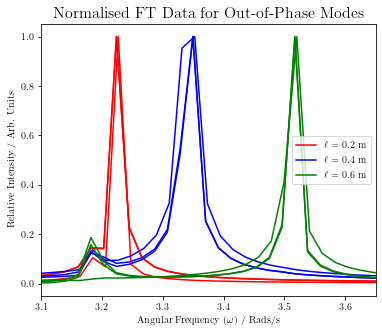

In [40]:
# Fancy Export Graph

plt.figure(figsize=[6,5])

for trial in ft3[0:3]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), (trial['Amplitude']/max(trial['Amplitude'])), color='r')

for trial in ft3[3:6]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), (trial['Amplitude']/max(trial['Amplitude'])), color='b')

for trial in ft3[6:9]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), (trial['Amplitude']/max(trial['Amplitude'])), color='g')

plt.xlim(3.1,3.65)
plt.xlabel('Angular Frequency ($\omega$) / Rads/s')
plt.ylabel('Relative Intensity / Arb. Units')
plt.legend(['$\ell =$ 0.2 m','_nolegend_','_nolegend_','$\ell =$ 0.4 m','_nolegend_','_nolegend_','$\ell =$ 0.6 m','_nolegend_','_nolegend_'])
plt.title('Normalised FT Data for Out-of-Phase Modes', fontsize=16)

plt.savefig('Diagrams/Normalised Out-of-Phase FT Frequency Comparrison.pdf', transparent=True)
#plt.savefig('Diagrams/Normalised Out-of-Phase FT Frequency Comparrison.svg', transparent=True)

[3.225508798703026, 3.2272934129139386, 3.2254822304125677, 3.345278051822578, 3.3426526074446445, 3.3456683251965713, 3.515485673163516, 3.517535622271018, 3.5154435283730225] [0.011348746878584122, 0.009163859237342083, 0.011384100919956076, 0.01692162352158244, 0.02249874419737292, 0.016351689082911812, 0.011180279109408647, 0.013912251415330087, 0.01134347330042137]


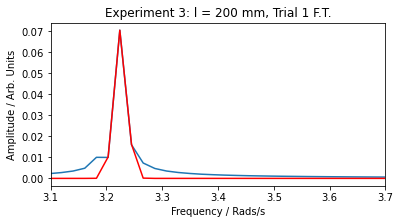

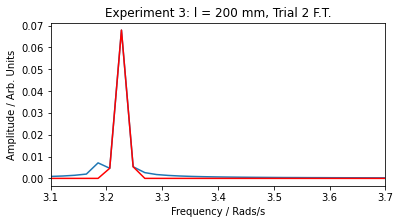

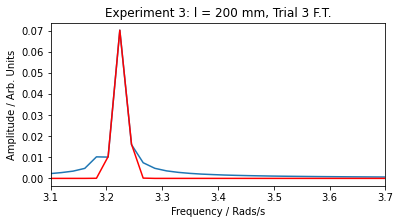

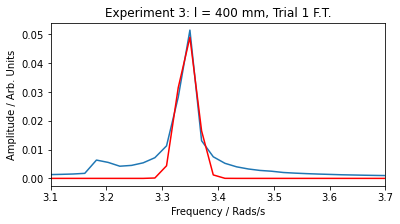

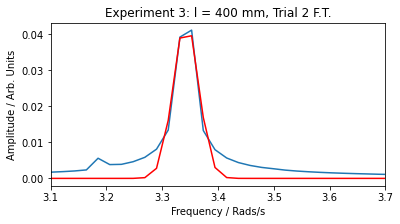

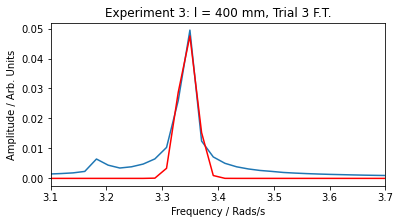

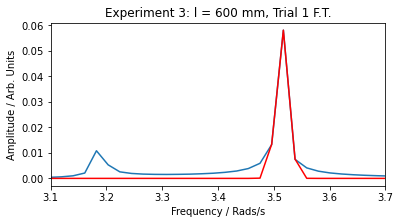

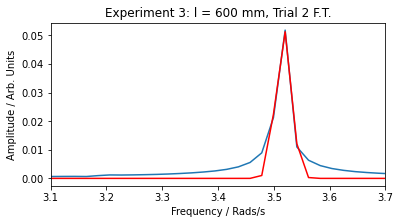

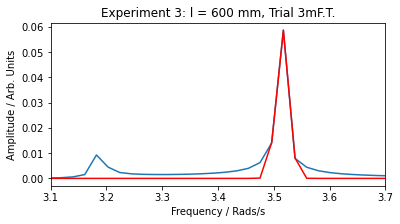

In [24]:
# Fitting Guassians and extracting values

def gauss(x, mu, sigma, A):
    return A*np.exp( (-1/2)*((x-mu)/sigma)**2 )

exp3_mean_peaks = []
exp3_peaks_U = []

for count, trial in enumerate(ft3):
    
    x_data = trial['Frequency (Hz)']*2*constants.pi
    #x_data = x_data[55:74]

    y_data = trial['Amplitude']
    #y_data = y_data[55:74]

    plt.figure(figsize=[6,3])
    plt.plot(x_data, y_data)
    plt.xlim(3.1,3.7)
    plt.xlabel('Frequency / Rads/s')
    plt.ylabel('Amplitude / Arb. Units')
    plt.title(ft3_title[count])

    # Fit a gaussian to the data
    popt, pcov = curve_fit(gauss, x_data, y_data, p0=[3.3, 0.12, 0.1]) 
    plt.plot(x_data, gauss(x_data, *popt), 'r-')

    exp3_mean_peaks.append(popt[0])
    exp3_peaks_U.append(abs(popt[1]))

print(exp3_mean_peaks, exp3_peaks_U)

In [25]:
# Simple Data Analysis

mu200 = np.mean(exp3_mean_peaks[0:3])
mu400 = np.mean(exp3_mean_peaks[3:6])
mu600 = np.mean(exp3_mean_peaks[6:9])

U200 = 2*np.mean(exp3_peaks_U[0:3])
U400 = 2*np.mean(exp3_peaks_U[3:6])
U600 = 2*np.mean(exp3_peaks_U[6:9])

print(' 0.2 m = ',mu200,' +/- ',U200,' 0.04 m = ',mu400,' +/- ',U400,' 0.06 m = ',mu600,' +/- ',U600)

 0.2 m =  3.226094814009844  +/-  0.021264471357254854  0.04 m =  3.3445329948212645  +/-  0.03718137120124478  0.06 m =  3.5161549412691855  +/-  0.024290669216773402


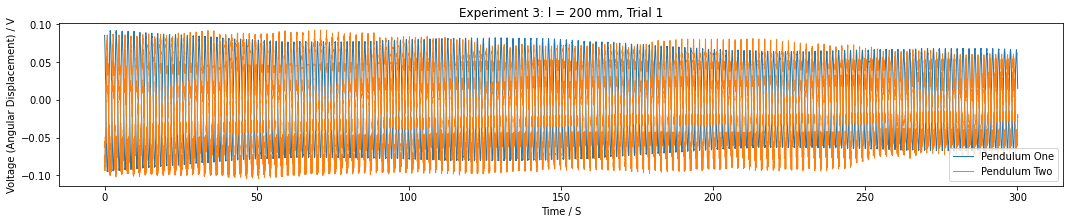

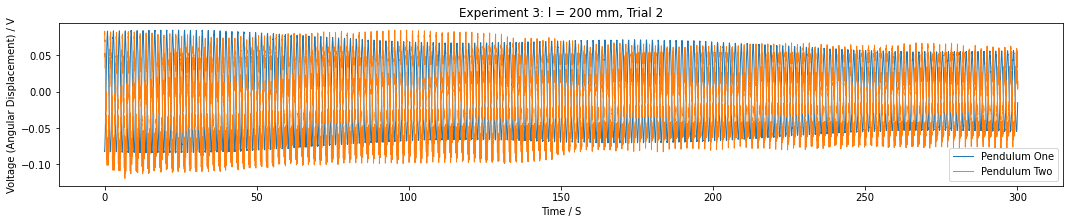

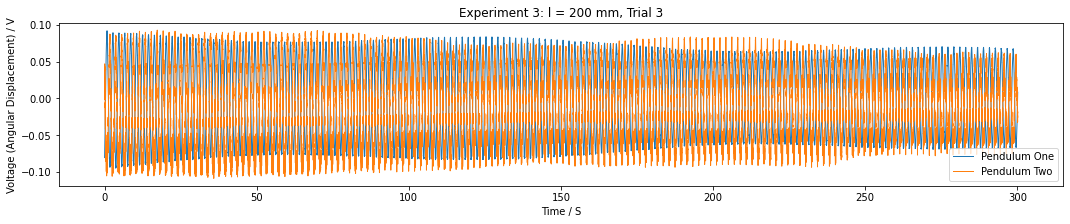

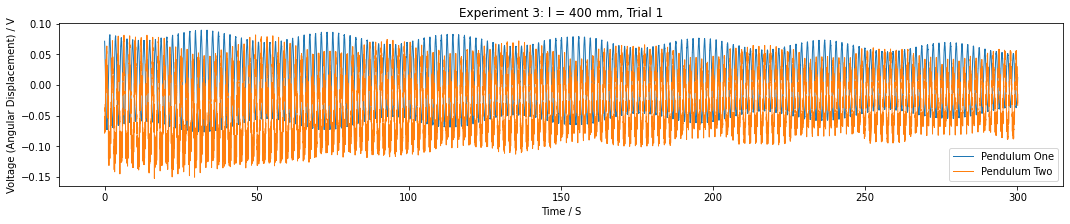

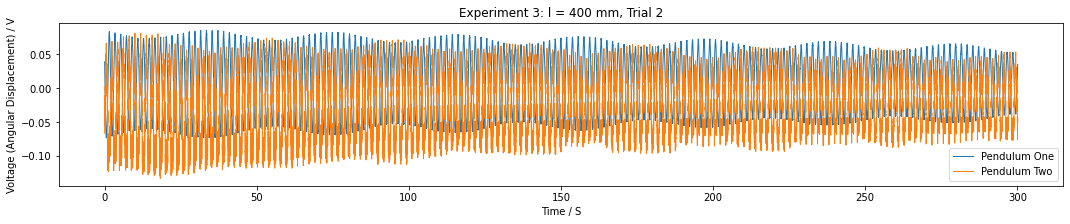

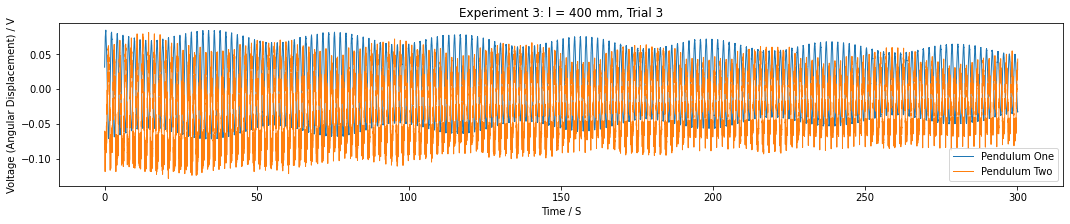

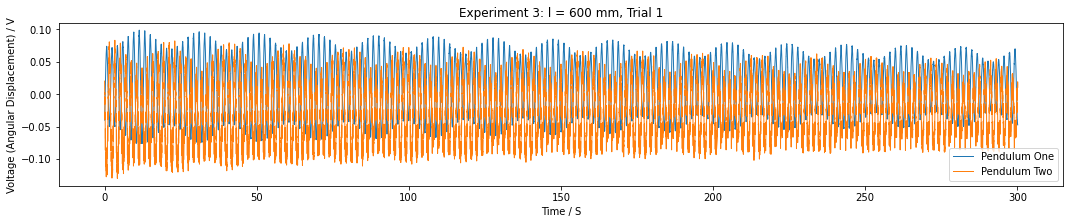

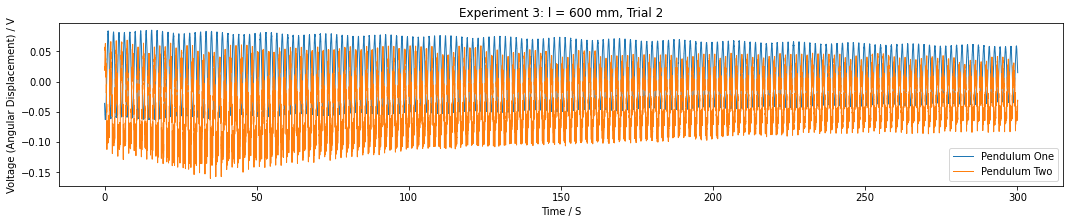

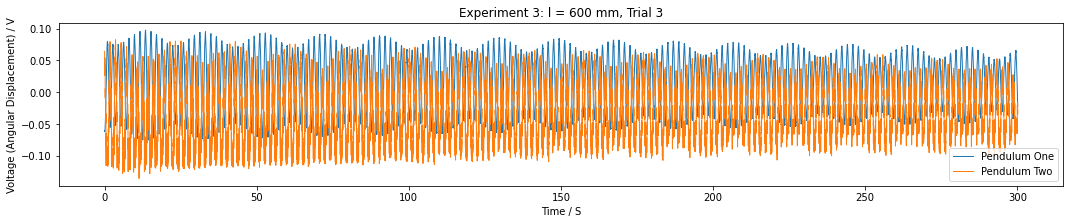

In [26]:
# Pendulum Displacement Plot

for count, trial, in enumerate(cp3):
    plt.figure(figsize=[18,3])
    plt.plot(trial['Time (s)'], trial[' Voltage 0 (V)'], label='Pendulum One', linewidth=1)
    plt.plot(trial['Time (s)'], trial['Voltage 1 (V)'], label='Pendulum Two', linewidth=1)
    plt.xlabel('Time / S')
    plt.ylabel('Voltage (Angular Displacement) / V')
    plt.legend()
    plt.title(cp3_title[count])

# **Experiment 4, Beat**

3 trials per $\ell$, 9 in total.

In [93]:
# Importing Data

# FT Data
# l = 200mm
ft52001 = pd.read_csv('Experimental Data/Week 2, Beat/ft 1100sec 200mm.csv')
ft52002 = pd.read_csv('Experimental Data/Week 2, Beat/ft 200mm 1200sec trial 2.csv')
ft52003 = pd.read_csv('Experimental Data/Week 2, Beat/ft 200mm 720 sec trial 3.csv')
# l = 400mm
ft54001 = pd.read_csv('Experimental Data/Week 2, Beat/f 10 min 400m.csv')
ft54002 = pd.read_csv('Experimental Data/Week 2, Beat/ft 1200 400mm trial 2.csv')
ft54003 = pd.read_csv('Experimental Data/Week 2, Beat/ft 400mm 950sec trial 3.csv')
# l = 600mm
ft56001 = pd.read_csv('Experimental Data/Week 2, Beat/ft 1000sec 600mm.csv')
ft56002 = pd.read_csv('Experimental Data/Week 2, Beat/ft 600mm 1000 sec trial 2.csv')
ft56003 = pd.read_csv('Experimental Data/Week 2, Beat/ft 600mm 1700sec trial 3.csv')

# CP Data
cp52001 = pd.read_csv('Experimental Data/Week 2, Beat/cp 1100sec 200mm.csv')
cp52002 = pd.read_csv('Experimental Data/Week 2, Beat/cp 200mm 1200sec trial 2.csv')
cp52003 = pd.read_csv('Experimental Data/Week 2, Beat/cp 200mm 720 sec trial 3.csv')
# l = 400mm
cp54001 = pd.read_csv('Experimental Data/Week 2, Beat/cp 10 min 400m.csv')
cp54002 = pd.read_csv('Experimental Data/Week 2, Beat/cp 1200 400mm trial 2.csv')
cp54003 = pd.read_csv('Experimental Data/Week 2, Beat/cp 400mm 950sec trial 3.csv')
# l = 600mm
cp56001 = pd.read_csv('Experimental Data/Week 2, Beat/cp 1000sec 600mm.csv')
cp56002 = pd.read_csv('Experimental Data/Week 2, Beat/cp 600mm 1000 sec trial 2.csv')
cp56003 = pd.read_csv('Experimental Data/Week 2, Beat/cp 600mm 1700sec trial 3.csv')

# Define Variable Lists

exp5_ft = [ft52001, ft52002, ft52003, ft54001, ft54002, ft54003, ft56001, ft56002, ft56003]
exp5_cp = [cp52001, cp52002, cp52003, cp54001, cp54002, cp54003, cp56001, cp56002, cp56003]

In [95]:
# Normalising

exp5_ft_norm = []

for trial in exp5_ft:
    temp = trial
    temp['Amplitude'] = temp['Amplitude']/max(temp['Amplitude'])
    exp5_ft_norm.append(temp)

<ipython-input-223-767dcdd3f8ba>:17: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000018A809FDA60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['$\ell =$ 0.2 m','_nolegend_','_nolegend_','$\ell =$ 0.4 m','_nolegend_','_nolegend_','$\ell =$ 0.6 m','_nolegend_','_nolegend_'])
<ipython-input-223-767dcdd3f8ba>:17: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000018A809FDDC0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['$\ell =$ 0.2 m','_nolegend_','_nolegend_','$\ell =$ 0.4 m','_nolegend_','_nolegend_','$\ell =$ 0.6 m','_nolegend_','_nolegend_'])
<ipython-input-223-767dcdd3f8ba>:17: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000018A80A074C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['$\ell =$ 0.2 m','_nolegend_','_nolegend_','$\ell =$ 0.4 m','_nolegend_','_nolegend_','$\ell =$ 0.6 m','_nolege

Text(0.5, 1.0, 'Normalised FT Data for Beat Modes')

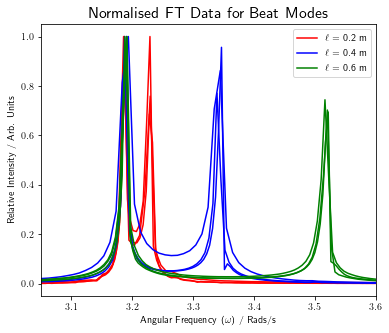

In [223]:
# Fancy Export Graph

plt.figure(figsize=[6,5])

for trial in exp5_ft_norm[0:3]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), trial['Amplitude'], color='r')

for trial in exp5_ft_norm[3:6]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), trial['Amplitude'], color='b')

for trial in exp5_ft_norm[6:9]:
    plt.plot(trial['Frequency (Hz)']*(constants.pi*2), trial['Amplitude'], color='g')

plt.xlim(3.05,3.6)
plt.xlabel('Angular Frequency ($\omega$) / Rads/s')
plt.ylabel('Relative Intensity / Arb. Units')
plt.legend(['$\ell =$ 0.2 m','_nolegend_','_nolegend_','$\ell =$ 0.4 m','_nolegend_','_nolegend_','$\ell =$ 0.6 m','_nolegend_','_nolegend_'])
plt.title('Normalised FT Data for Beat Modes', fontsize=16)

#plt.savefig('Diagrams/Normalised Beat FT Frequency Comparrison.pdf', transparent=True)
#plt.savefig('Diagrams/Normalised Beat FT Frequency Comparrison.svg', transparent=True)

**STOP STOP STOP**

This cell takes a while to run. Make sure the $\LaTeX$ export thing at the top is turned OFF before running it.

[3.1885567037440605, 3.1869650877125446, 3.185720858117182, 3.1898021955806235, 3.1884065550201965, 3.187480253162075, 3.18885099685902, 3.188619338895099, 3.188598841933631]
[3.2268982126838863, 3.2284427086850287, 3.2276992348287528, 3.339809706250891, 3.344477232384339, 3.3396488693548134, 3.5179579431925037, 3.515827475219195, 3.518293504196533]
[0.005654413872932316, 0.0038160537149609167, 0.00478468077615793, 0.010885156077151719, 0.005045607345552506, 0.004516085333996277, 0.005387255175977377, 0.006294499104212497, 0.0048975419987908764]
[0.005154829788567292, 0.00733924969349009, 0.006082467607784251, 0.011110225099572558, 0.004287564990687783, 0.0067641584635052725, 0.006651193793496749, 0.008399290726876844, 0.00616403994835588]


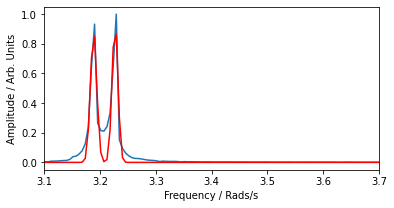

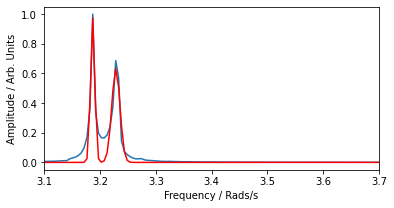

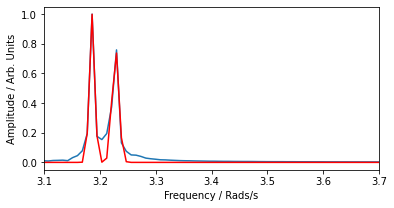

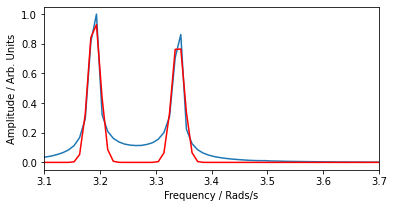

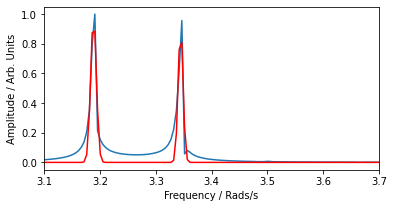

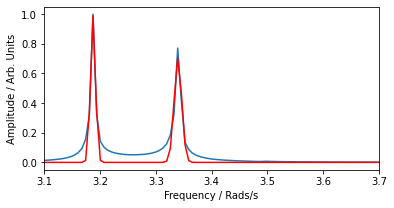

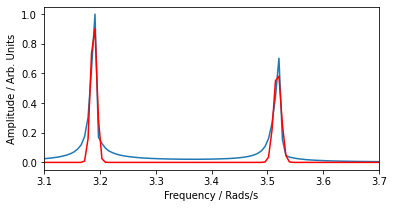

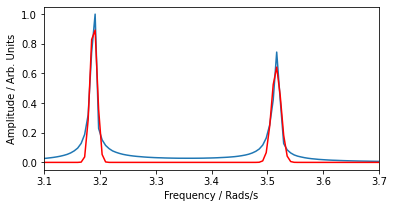

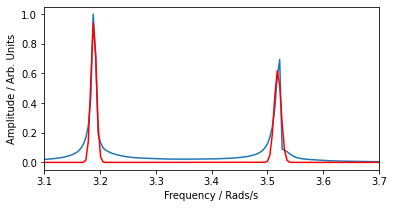

In [35]:
# Peak Fitting

def gauss2(x, mu1, mu2, sigma1, sigma2, A, B):
    return A*np.exp( (-1/2)*((x-mu1)/sigma1)**2 ) + B*np.exp( (-1/2)*((x-mu2)/sigma2)**2 )

exp4_mean_peaks1 = []
exp4_mean_peaks2 = []

exp4_peaks_U1 = []
exp4_peaks_U2 = []

for count, trial in enumerate(exp5_ft_norm):
    
    x_data = trial['Frequency (Hz)']*2*constants.pi
    #x_data = x_data[55:74]

    y_data = trial['Amplitude']
    #y_data = y_data[55:74]

    plt.figure(figsize=[6,3])
    plt.plot(x_data, y_data)
    plt.xlim(3.1,3.7)
    plt.xlabel('Frequency / Rads/s')
    plt.ylabel('Amplitude / Arb. Units')

    # Fit a gaussian to the data
    # Different initial conditions for each to increase SPEED
    
    if count < 3:
        popt, pcov = curve_fit(gauss2, x_data, y_data, p0=[3.18980219, 3.33980962, 0.01088521, 0.01111048, 0.99007111, 0.84616467])

    elif count < 6:
        popt, pcov = curve_fit(gauss2, x_data, y_data, p0=[3.1898022,  3.3398096,  0.01088517, 0.01111051, 0.99007288, 0.84616322])
        
    else:
        popt, pcov = curve_fit(gauss2, x_data, y_data, p0=[3.18885093, 3.51795784, 0.0053874,  0.00665137, 0.97687137, 0.63200098])

    plt.plot(x_data, gauss2(x_data, *popt), 'r-')

    exp4_mean_peaks1.append(popt[0])
    exp4_mean_peaks2.append(popt[1])
    
    exp4_peaks_U1.append(abs(popt[2]))
    exp4_peaks_U2.append(abs(popt[3]))

print(exp4_mean_peaks1)
print(exp4_mean_peaks2)
print(exp4_peaks_U1)
print(exp4_peaks_U2)

In [36]:
# Simple Data Analysis

mu2001 = np.mean(exp4_mean_peaks1[0:3])
mu4001 = np.mean(exp4_mean_peaks1[3:6])
mu6001 = np.mean(exp4_mean_peaks1[6:9])

U2001 = 2*np.mean(np.abs(exp4_peaks_U1[0:3]))
U4001 = 2*np.mean(np.abs(exp4_peaks_U1[3:6]))
U6001 = 2*np.mean(np.abs((exp4_peaks_U1[6:9])))

print('For the First Peak:')
print(' 0.2 m = ',mu2001,' +/- ',U2001,' 0.04 m = ',mu4001,' +/- ',U4001,' 0.06 m = ',mu6001,' +/- ',U6001)


mu2002 = np.mean(exp4_mean_peaks2[0:3])
mu4002 = np.mean(exp4_mean_peaks2[3:6])
mu6002 = np.mean(exp4_mean_peaks2[6:9])

U2002 = 2*np.mean(np.abs(exp4_peaks_U2[0:3]))
U4002 = 2*np.mean(np.abs(exp4_peaks_U2[3:6]))
U6002 = 2*np.mean(np.abs((exp4_peaks_U2[6:9])))

print('For the Second Peak:')
print(' 0.2 m = ',mu2002,' +/- ',U2002,' 0.04 m = ',mu4002,' +/- ',U4002,' 0.06 m = ',mu6002,' +/- ',U6002)

For the First Peak:
 0.2 m =  3.1870808831912623  +/-  0.009503432242700775  0.04 m =  3.1885630012542983  +/-  0.013631232504467003  0.06 m =  3.1886897258959173  +/-  0.011052864185987166
For the Second Peak:
 0.2 m =  3.2276800520658893  +/-  0.01238436472656109  0.04 m =  3.3413119359966807  +/-  0.014774632369177075  0.06 m =  3.5173596408694103  +/-  0.014143016312486314


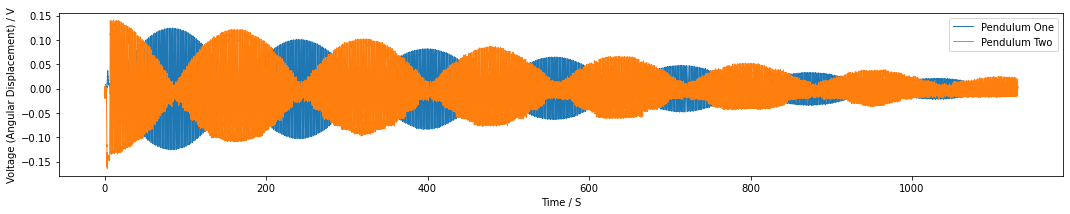

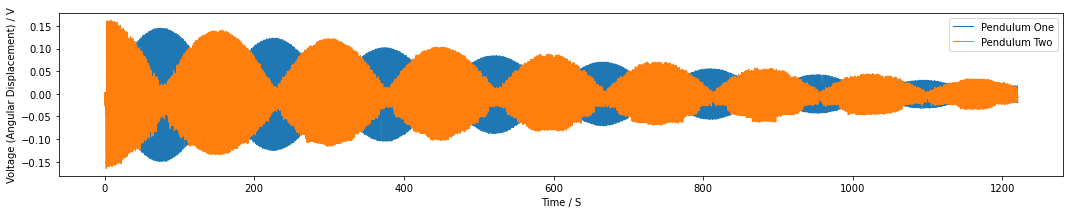

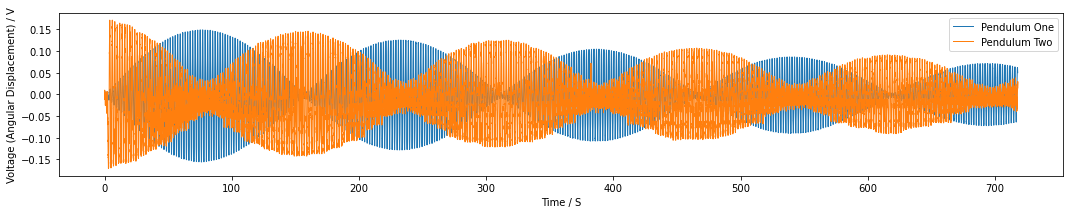

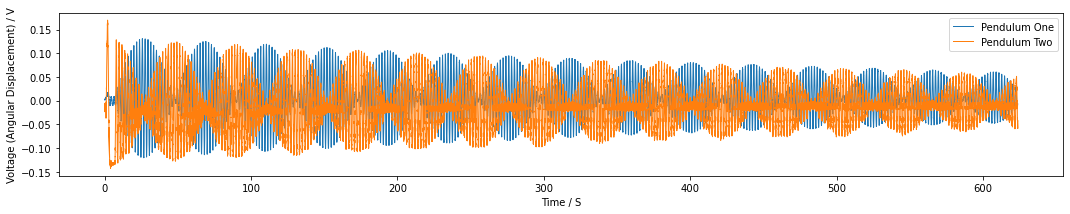

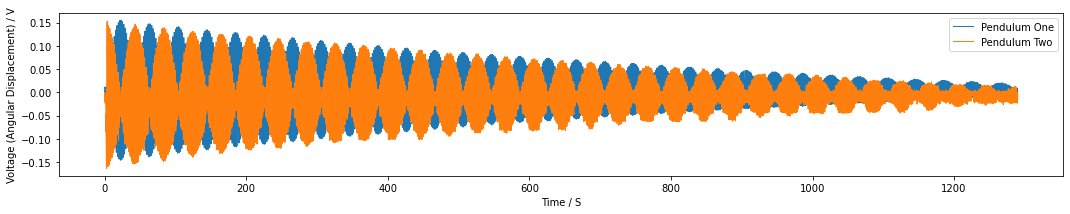

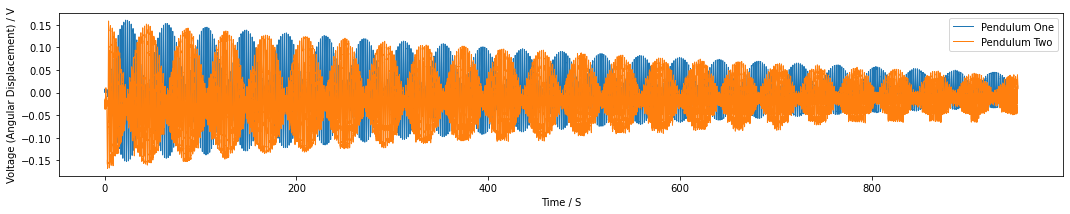

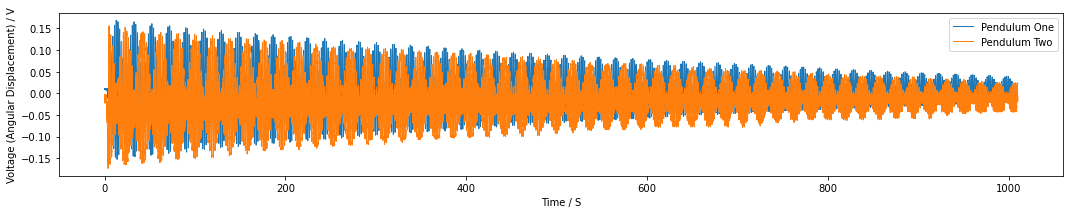

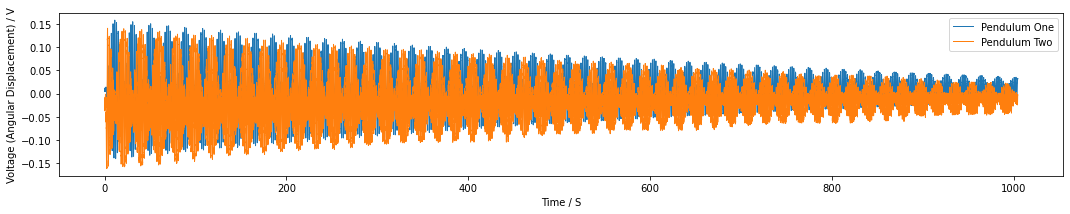

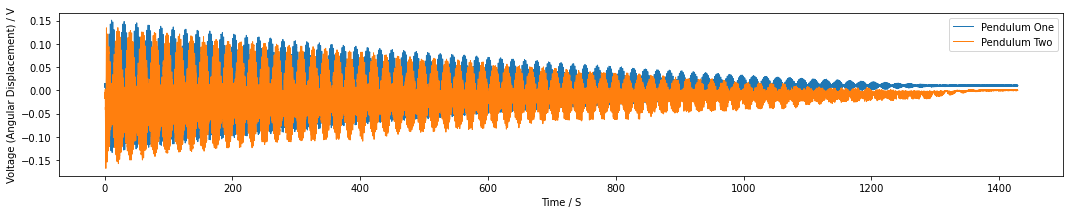

In [98]:
# CP data Plots

for trial in exp5_cp:
    plt.figure(figsize=[18,3])
    plt.plot(trial['Time (s)'], trial[' Voltage 0 (V)'], label='Pendulum One', linewidth=1)
    plt.plot(trial['Time (s)'], trial['Voltage 1 (V)'], label='Pendulum Two', linewidth=1)
    plt.xlabel('Time / S')
    plt.ylabel('Voltage (Angular Displacement) / V')
    plt.legend()

# **Numerical Methods Solutions**

Strongly influence / basically copy of the logic of https://fcichos.github.io/CompSoft21/notebooks/L6/3_fourier_analysis.html

In [3]:
def coupled_pendula(state,t):
    g0=state[1]
    g1=(-k*l**2/1/1**2-g/1)*np.sin(state[0])+k*l**2*np.sin(state[2])/1/1**2
    g2=state[3]
    g3=(-k*l**2/m/1**2-g/1)*np.sin(state[2])+k*l**2*np.sin(state[0])/1/1**2
    return np.array([g0,g1,g2,g3])

Unfortunatly I could not find a nice way to loop this. Rerun for different values of k and g manually.

In [4]:
# Initial parameters
# L = m = 1, g = acceleratio due to gravity, l = $\ell$, k = spring constant,

g=constants.g # gravitational acceleration
l=0.4  # coupling distance from the mount
k=3.11    # coupling spring constant
m = 1

In [5]:
# inital angles, initial angular velocities

# In Phase
a1=np.pi/12    # initial angle for pendulum 1
b1=np.pi/12    # initial angle for pendulum 2
o11=0.0        # initial angular velocity for pendulum 1
o21=0.0        # initial angular velocity for pendulum 2

inphase = np.array([a1,o11,b1,o21])

# Out of Phase
a2=np.pi/12    # initial angle for pendulum 1
b2=-np.pi/12   # initial angle for pendulum 2
o12=0.0        # initial angular velocity for pendulum 1
o22=0.0        # initial angular velocity for pendulum 2

outphase = np.array([a2,o12,b2,o22])


# Beat
a3=np.pi/12    # initial angle for pendulum 1
b3=0           # initial angle for pendulum 2
o13=0.0        # initial angular velocity for pendulum 1
o23=0.0        # initial angular velocity for pendulum 2

beat = np.array([a3,o13,b3,o23])

states = [inphase,outphase,beat]

print(states)

[array([0.26179939, 0.        , 0.26179939, 0.        ]), array([ 0.26179939,  0.        , -0.26179939,  0.        ]), array([0.26179939, 0.        , 0.        , 0.        ])]


In [6]:
# Solution Parameters
time=1200  # total time to be simulated (in seconds)
N=200000   # number of timesteps for the simulation
t=np.linspace(0,time,N) # times at which the amplitudes shall be calculated
m = 1

# Solution Space
solutions = []

# Graph/solutions titles
titles = ['In Phase','Out of Phase','Beat']

**STOP STOP STOP**

Another super beefy cell ahead, make sure $\LaTeX$ export setting is disabled.

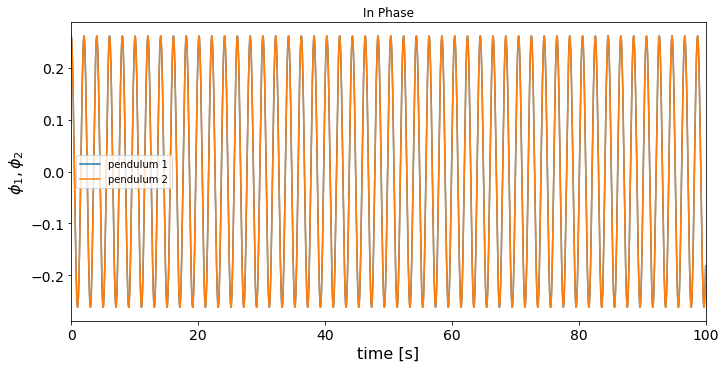

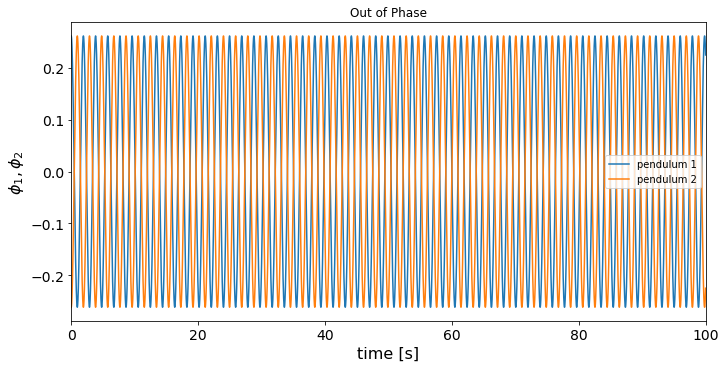

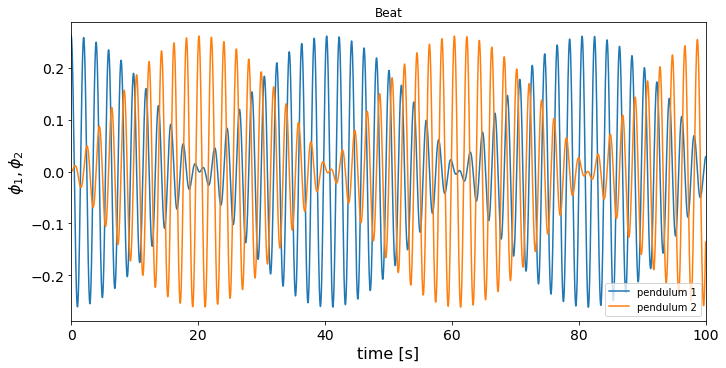

The Spring constant used is  3.11
l is  0.4


In [7]:
# Solve the ODE and print a quick plot

for count, state in enumerate(states):

    #solve the differential equations
    answer=odeint(coupled_pendula,state,t)

    # angles
    theta1=answer[:,0]
    theta2=answer[:,2]

    #saving theta1 answers
    solutions.append(theta1)

    # angular velocities
    omega1=answer[:,1]
    omega2=answer[:,3]

    #cordinates of the two masses at the end of the pendulum
    xdata1=np.sin(theta1)
    xdata2=np.sin(theta2)
    ydata1=np.cos(theta1)
    ydata2=np.cos(theta2)


    # Plotting the solutions
    plt.figure(figsize=(10,5))
    plt.xlabel('time [s]', fontsize=16)
    plt.ylabel(r'$\phi_1,\phi_2$',fontsize=16)
    plt.tick_params(labelsize=14)
    plt.plot(t,theta1,label='pendulum 1')
    plt.plot(t,theta2,label='pendulum 2')
    plt.legend()
    plt.tight_layout()
    plt.xlim(0,100)
    plt.title(titles[count])
    plt.show()

print('The Spring constant used is ',k)
print('l is ',l)

In [8]:
freq = np.fft.fftfreq(t.shape[-1],time/t.shape[-1])
freq = freq[:1000]*2*np.pi

theta1_nm1 = solutions[0] 
theta1_nm2 = solutions[1]
theta1_beats = solutions[2]

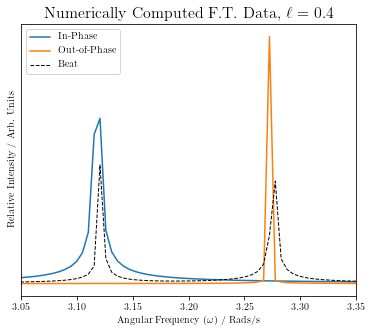

In [10]:
# calculate the frequency spectrum of the oscillations for different initial conditions
plt.figure(figsize=[6,5])
plt.xlabel('Angular Frequency ($\omega$) / Rads/s')
plt.ylabel('Relative Intensity / Arb. Units')
plt.yticks([])

plt.title('Numerically Computed F.T. Data, $\ell = 0.4$', fontsize=16)

ft1=np.fft.fft(theta1_nm1)
plt.plot(freq,np.abs(ft1)[:1000],label='In-Phase')

ft2=np.fft.fft(theta1_nm2)
plt.plot(freq,np.abs(ft2)[:1000],label='Out-of-Phase')

ft3=np.fft.fft(theta1_beats)
plt.plot(freq,np.abs(ft3)[:1000],'k--',lw=1,label='Beat')

plt.legend()
plt.xlim(3.05,3.35)
#plt.savefig('Diagrams/Numerical.pdf', transparent=True)
plt.show()

The beat mode is a bit rough, but we can clearly see it as a superpoision of the other two.

We will extract $\omega_n$ and $\omega'$ by fitting guassians as usual.

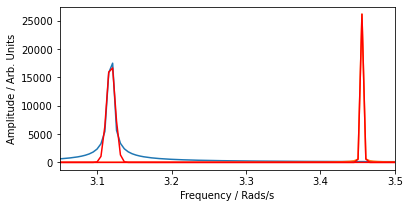

In [217]:
# Fitting Guassians and extracting values

def gauss(x, mu, sigma, A):
    return A*np.exp( (-1/2)*((x-mu)/sigma)**2 )

x_data = freq[:1000]

y_data1 = np.abs(ft1)[:1000]
y_data2 = np.abs(ft2)[:1000]

plt.figure(figsize=[6,3])
plt.plot(x_data, y_data1)
plt.plot(x_data, y_data2)
plt.xlim(3.05,3.5)
plt.xlabel('Frequency / Rads/s')
plt.ylabel('Amplitude / Arb. Units')

# Fit a gaussian to the data
popt1, pcov1 = curve_fit(gauss, x_data, y_data1, p0=[3.11941259e+00, 5e-03, 1e+04]) 
plt.plot(x_data, gauss(x_data, *popt1), 'r-')

popt2, pcov2 = curve_fit(gauss, x_data, y_data2, p0=[3.175, 5e-03, 1.e+04]) 
plt.plot(x_data, gauss(x_data, *popt2), 'r-')



In [218]:
print('First peak is ',popt1[0],' +/- ',popt1[1]*2)

print('Second peak is ',popt2[0],' +/- ',popt2[1]*2)

First peak is  3.118300099146845  +/-  0.011199634203881651
Second peak is  3.455766776075983  +/-  0.0037976067901116625


**End**

Play around with the Numerical settings a bit (with $\LaTeX$ export off) and have a loong at the pendulum displacement graphs.